# Module 5 Exercises_2 (`for`-Loops)
Please use Module 5 and online references to complete the following exercises. Before you start, please run the following cell to load the libraries that we will need for our exercises.

In [1]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 

# we also need the mplot3d library to make 3D plots
from mpl_toolkits import mplot3d

# the next line allows plots to be displayed within a Jupyter notebook
# the command, preceded by a % sign, is known as a "magic" command
# and comments on the same line aren't allowed
%matplotlib inline

### Exercise 1
You have probably seen many examples of 7-day moving average pandemic statistics lately. In this Exercise, we will write a `for` loop to calculate our own moving average for a given set of data. We will do this in several steps. Please follow similar steps when you are learning to write `for` loops. 

(a) Create a list of 5 elements (call it `data`) using the command `np.arange(5)`. Create another list (call it `avgData`) that will contain the moving average of two adjacent elements in `data`. How many elements should `avgData` have? First initialize all elements in `avgData` to 0 using `np.zeros`. We will use the `np.average` command for calculating the average (look it up if you are not familiar with it).  First write a few lines of code to calculate the 2-point moving average **without** using a loop, so that the first element in `avgData` is equal to the average of `data[0:2]` (why is the second index 2 instead of 1?), and the second element is the average of`data[1:3]`, etc. Print both lists at the end to make sure that the results are correct.

(**Coding tips**: We **use a very short, regular list** here to make debugging easier.)

(b) We will convert Part (a) to a loop using the following three steps:

1. Examine the code to see which section has a repeating pattern that can be replaced with a `for` loop. Replace all numerical indexes in this "would-be loop" section with an index variable `n` (and/or indexes related to `n`, such as `n+1` or `n-1`). Also indicate the value of `n` following each line of commands. Comment out these lines.

2. Figure out how to create a list that contains all the values of `n` in the lines you have just commented out. This is your `loop_list` that will go into your `for` line (`for n in loop_list :`).

3. Copy **one repeating unit** in Step 1 above and insert the entire unit in the `for` loop (indented, of course). Delete the rest of the repeating units.

Run your code to make sure that the results agree with Part (a).

(c) We now want to make the code work for *any* length of `data`. We first create a new variable called `totalNum` at the top of the code and set it to 5 initially. Change all other nemerical indexes that are related to the length of `data` using the variable name `totalNum`, `totalNum + 1`, or `totalNum - 1`, etc. (For example, `data = np.arange(totalNum)`, instead of `data = np.arange(5)`) Run your code again to make sure that the results agree with Part (b). (Please be patient here; it is very easy to make mistakes.) 

Set `totalNum` to 10 to make sure that the code still works. 

(d) We now want to make further changes to the code so that we can do moving average over more than just 2 data points; we will call the number of points being averaged `avgNum`. Set `avgNum` to 2 to make sure that the results with Part (c), and then change `avgNum` to 3 and 4 to make sure that the code still produces correct results. Please use steps similar to those in Part (c), and, again, be very patient.

(e) Use the following code to generate data points that represent a noisy sinusoidal function that depends on time:

`totalNum = 100` <br>
`t = np.linspace(0,2*np.pi,totalNum)` <br>
`data = np.sin(t) + 0.2*np.random.rand(totalNum)`

Use your code in part (d) to create a moving average of `data` with `avgNum` = 2, 5, and 10. Plot the moving average as a function of time to see how the curve becomes smoother as `avgNum` increases. Please keep in mind that when plotting a curve, the lengths of the lists for the horizontal and vertical coordinates have to be the same. Since `t` and `avgData` don't have the same length, you need to index the list `t` to make the code work.


In [2]:
# Exercise 1, Part (a)
data = np.arange(5)
avgData = np.zeros(len(data)-1)

avgData[0] = np.average(data[0:2])
avgData[1] = np.average(data[1:3])
avgData[2] = np.average(data[2:4])
avgData[3] = np.average(data[3:5])

print("Data: ", data)
print("Moving average: ", avgData)

Data:  [0 1 2 3 4]
Moving average:  [0.5 1.5 2.5 3.5]


In [3]:
# Exercise 1, Part (b)
loop_list = range(len(data)-1)

for n in loop_list:
    avgData[n] = np.average(data[n:n+2])
    
print("Data: ", data)
print("Moving average: ", avgData)

Data:  [0 1 2 3 4]
Moving average:  [0.5 1.5 2.5 3.5]


In [5]:
# Exercise 1, Part (c)
totalNum = 5
avgData = np.zeros(totalNum-1)

loop_list = range(totalNum-1)

for n in loop_list:
    avgData[n] = np.average(data[n:n+2])
    
print("Data: ", data)
print("Moving average: ", avgData)

totalNum = 10

for n in loop_list:
    avgData[n] = np.average(data[n:n+2])
    
print("Data: ", data)
print("Moving average: ", avgData)

Data:  [0 1 2 3 4]
Moving average:  [0.5 1.5 2.5 3.5]
Data:  [0 1 2 3 4]
Moving average:  [0.5 1.5 2.5 3.5]


In [6]:
# Exercise 1, Part (d)

totalNum = 10
data = np.arange(totalNum)
avgNum = 2
avgData = np.zeros(totalNum - avgNum + 1)

for n in range(totalNum - avgNum + 1):
    avgData[n] = np.average(data[n:n+avgNum])

print("Data:", data)
print("Moving average of", avgNum, "adjacent elements:", avgData)

Data: [0 1 2 3 4 5 6 7 8 9]
Moving average of 2 adjacent elements: [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5]


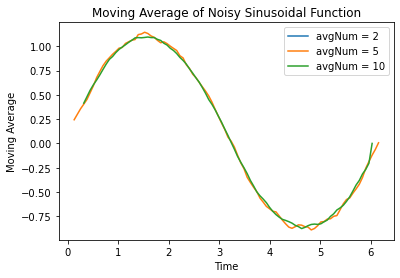

In [10]:
# Exercise 1, Part (e)
totalNum = 100
t = np.linspace(0, 2*np.pi, totalNum)
data = np.sin(t) + 0.2*np.random.rand(totalNum)

def moving_average(data, avgNum):
    avgData = np.zeros_like(data)
    for n in range(avgNum//2, len(data)-(avgNum//2)):
        avgData[n] = np.average(data[n-(avgNum//2):n+(avgNum//2)+1])
    return avgData

avgNum_list = [2, 5, 10]
for avgNum in avgNum_list:
    avgData = moving_average(data, avgNum)
    plt.plot(t[avgNum//2:-avgNum//2+1], avgData[avgNum//2:-avgNum//2+1], label=f'avgNum = {avgNum}')

plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.title('Moving Average of Noisy Sinusoidal Function')
plt.legend()
plt.show()

### Exercise 2
You may have learned in your calculus class that the length of the curve $y(x)$ in the region $a \le x \le b$ can be calculated using the formula

$$\int_a^b {\sqrt {1 + {{\left( {\frac{{dy}}{{dx}}} \right)}^2}} } dx $$.

For many functions, however, the above integral do not have closed-form solutions, and it is necessary to use numerical methods. In this Exercise, we will use the following steps to find the length of the curve 
$$y=x^2$$ 
between $0 \le x \le 1$. 

(a) Plot this function twice — one using dots ('ro') and another lines ('b-'), on the same graph — using six evenly spaced points (`totalNum=6`). You can probably guess that we are going to use straight line segments to approximate the curved lines between adjacent points.

(b) We will use the Pythagorean theorem to find the length of each straight line segment. For example, the length of the first one segment is equal to

`np.sqrt( (x[1]-x[0])**2 + (y[1]-y[0])**2 )`

Create a variable `totalLength` and initialize it to 0. Write a few lines of code to calculate the length of each segment and add the result to `totalLength` (**no loop in this part**).

(c) Following steps similar to those in Exercise 1 to convert the code in Part (b) to a `for` loop, and make sure that it works for any value of `totalNum`. Compare your numerical result with the analytical result 
$ \frac{1}{4}\left( {2\sqrt 5 +{{\sinh }^{ - 1}}(2)} \right) \approx 1.4789$, where ${\rm sinh}^{-1}(x)$ is the inverse hyperbolic sine function. (See https://www.wolframalpha.com/input/?i=integrate+Sqrt%281%2B4+x%5E2%29+dx+from+x%3D0+to+1) 

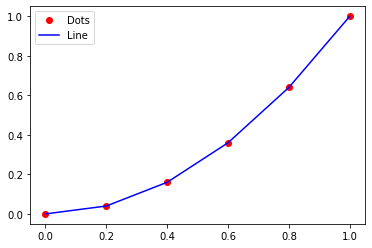

In [11]:
# Exercise 2, Part (a)
totalNum = 6
x = np.linspace(0, 1, totalNum)

y = x**2

plt.plot(x, y, 'ro', label='Dots')
plt.plot(x, y, 'b-', label='Line')
plt.legend()
plt.show()

In [15]:
# Exercise 2, Part (b)

segmentLengths = np.sqrt((x[1:]-x[:-1])**2 + (y[1:]-y[:-1])**2)
totalLength = np.sum(segmentLengths)

In [16]:
# Exercise 2, Part (c)
x = np.linspace(0,1,totalNum)
y = x**2
totalLength = 0

for i in range(totalNum-1):
    segmentLength = np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
    totalLength += segmentLength

print("Numerical result:", totalLength)

analyticalResult = 14 * np.sqrt(25 + np.arcsinh(2))
print("Analytical result:", analyticalResult)

Numerical result: 1.4759597851333277
Analytical result: 71.99272569596909


### Exercise 3 (Optional)
We can also use numerical techniques to find the volume of a solid. For example, if we cut the funnel-shaped surface below with a horizontal plane, we will get a circle. The radius of the circle, however, depends on the z-coordinate of the cutting plane. In this example, the radius is $r=z^2$ at the height $z$. To find the volume of a solid enclosed by this surface between two horizontal planes of vertical heights $z_A = 0$ and $z_B = 1$, respectively, we first cut the solid into many horizontal disks of uniform thickness. The volume of a disk at height $z$ is approximately the area of the disk ($\pi r^2$) times its thickness ($\Delta z$). (Remember $r=z^2$ here.)

**Plan your coding strategy with your groupmate(s)** and write a Python program to calculate the volume using the disk method described above. Please keep in mind that this method approximates the disks as cylinders, which is not exact, because the sides of our disks are not perfectly vertical. This type of numerical error, however, can be minimized if you choose the surface area of a disk to be the average of the top and bottom surfaces, or you can use the radius calculated using the $z$ value at the middle of the disk. Compare your result with the **exact answer**: $\pi /5$. (The numerical error in this exercise can be less than 1e-4 when 100 disks are used.) 

(Surfaces such as the one discussed here are called **surfaces of revolution**, because they can be obtained by rotating a curve in the $xz$-plane ($z = \sqrt x$ in this exercise) about the $z$ axis. Try to solve this analytically if you have taken MATH 116 or MATH 205. This video may also be helpful: https://www.youtube.com/watch?v=QLo5dRFEyl8&ab_channel=MITOpenCourseWare)

(**Hint**: Even though no detailed instruction on how to write the code is given here, you may want to apply the strategy used in Exercise 1.)

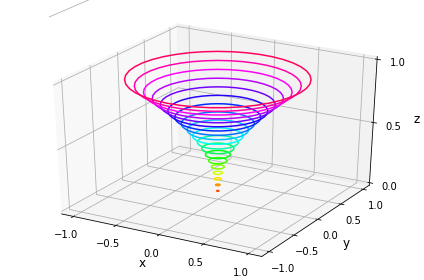

In [10]:
# Exercise 3
# Plot the parabolic surface created by rotating the curve z = x**2 about the z-axis.

r = np.linspace(0,1,20)
theta = np.linspace(0,2*np.pi,40)
R, Theta = np.meshgrid(r, theta)
Z = np.sqrt(R)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(Theta), R*np.sin(Theta)

########
# The commented out code will plot in Cartesian coordinates; not as pretty
#x = np.linspace(-1, 1, 11)  #grid points along the x-axis
#y = np.linspace(-1, 1, 11)  #grid points along the y-axis

#X, Y = np.meshgrid(x, y)  #make mesh grids; variables are case-sensitive
#Z = (X**2 + Y**2)**(1/4)   #calculate the z-values for all grid points
########

ax = plt.axes(projection='3d')   #3D plot
ax.contour3D(X, Y, Z, 20, cmap='hsv')   #make a contour plot, 30 z-levels
#ax.set_zlim3d(0, 1)

ax.set_xlabel('x', fontsize = 12)
ax.set_ylabel('y', fontsize = 12)
ax.set_zlabel('z', fontsize = 12)

ax.set_xticks(np.linspace(-1,1,5))
ax.set_yticks(np.linspace(-1,1,5))
ax.set_zticks(np.linspace(0,2,5))

plt.tight_layout()  # This avoids the z-label being cut off

plt.show()

In [11]:
# Exercise 3


### Exercise 4 (Optional)
The following equations specify the $x$- and $y$-coordinates of a curve, with $t$ as a parameter. (These are called **parametric equations** for curves, which are more general than equations given by $y(x)$.) 

$$x(t) = 16 sin^3(t),$$

$$y(t) = 13 cos(t)-5 cos(2t)-2 cos(3t)- cos(4t).$$

(a) You have plotted this curve in the exercises in Module 4. But we will re-create the plot here:
* Create a list for $t$ ranging from 0 to 2$\pi$ with 100 segments. 
* Create the corresponding lists for $x$ and $y$ using the equations above.
* Make a plot of $y$ vs. $x$ using dots ('ro').
* Make the figure a square using plt.figure('figsize',(8,8)).

(b) Find the an approximate value for the **length** of this curve using the following steps:

* Divide the curve into equal intervals in $t$ (not in $x$ or $y$), 
    
* Treat each segment of the curve as a straight line and calculate the length of the $n$th segment using
    $$\Delta {l_n} = \sqrt {{{\left( {\Delta {x_n}} \right)}^2} + {{\left( {\Delta {y_n}} \right)}^2}},$$
    
* Construct a `for` loop to find the length of the entire curve. (Answer: $\approx 102.1$)


In [12]:
# Exercise 4
